## Load Data

In [ ]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Skip Connection

In [ ]:
# solution 5: skip-connection

initializer = tf.keras.initializers.RandomNormal()

#################### YOUR CODE HERE ####################
# Các bạn sẽ thực hiện 2 path skip connection (cụ thể là residual connection) 
# Bước 1: Thực hiện 1 skip connection path tử output của hidden layer 1 đến output của hidden layer 3
# Bước 2: Thực hiện 1 skip connection path tử output của hidden layer 4 đến output của hidden layer 7
inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(inputs)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(128, activation='sigmoid', kernel_initializer=initializer)(x)
x = keras.layers.Dense(10)(x)
########################################################

model = keras.Model(inputs, x)

# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

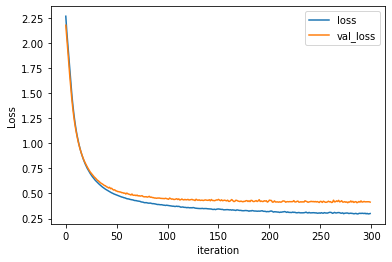

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

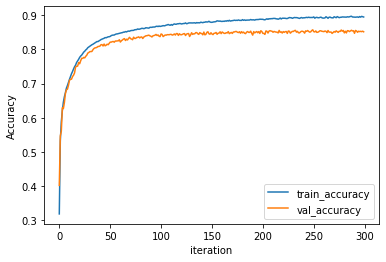

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()